### Importing necessary packages

In [237]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
import warnings
from itertools import islice
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
warnings.filterwarnings('ignore')

### Reading the Data Set

In [238]:
df = pd.read_csv('featuresMaxLite.csv')
df

,User_ID,Feature,Description,Rating,Type
0,A0001,OS,Android,0,Software
1,A0002,OS,Android,0,Software
2,A0003,OS,Android,10,Software
3,A0004,OS,Android,2,Software
4,A0005,OS,Android,7,Software
...,...,...,...,...,...
1895,A0096,Mobile Weight,136,0,Hardware
1896,A0097,Mobile Weight,136,1,Hardware
1897,A0098,Mobile Weight,136,1,Hardware
1898,A0099,Mobile Weight,136,2,Hardware


### Exploratory Data Analysis

In [239]:
df.head()

,User_ID,Feature,Description,Rating,Type
0,A0001,OS,Android,0,Software
1,A0002,OS,Android,0,Software
2,A0003,OS,Android,10,Software
3,A0004,OS,Android,2,Software
4,A0005,OS,Android,7,Software


In [240]:
df.describe()

,Rating
count,1900.000000
mean,5.079474
std,3.113527
min,0.000000
25%,2.000000
50%,5.000000
75%,8.000000
max,10.000000


In [241]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1900 entries, 0 to 1899
Data columns (total 5 columns):
User_ID        1900 non-null object
Feature        1900 non-null object
Description    1900 non-null object
Rating         1900 non-null int64
Type           1900 non-null object
dtypes: int64(1), object(4)
memory usage: 74.3+ KB


In [242]:
df.isnull().sum()

User_ID        0
Feature        0
Description    0
Rating         0
Type           0
dtype: int64

In [243]:
px.pie(data_frame = df, names = 'Type', title='Percentage of Hardware and Software Features', hole=0.2)

In [244]:
#histogram
px.histogram(data_frame = df, x = 'Type', color='Feature', title = 'Hardware or Software Feature')

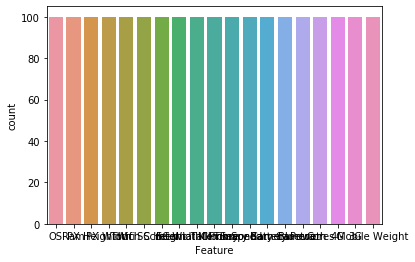

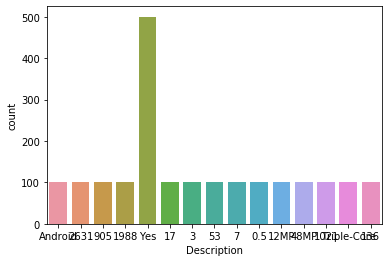

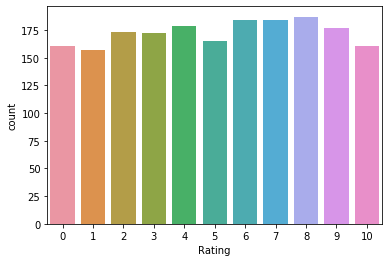

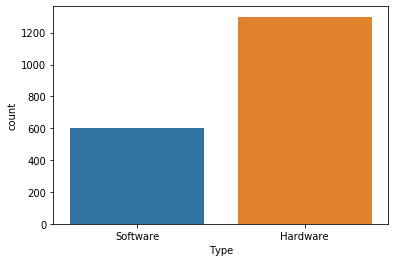

In [245]:
#CountPlot for various columns for train dataset
for i in df:
    if(df[i].nunique()<30):
        sns.countplot(x = df[i])
        plt.show()

### Finding out the Average Ratings

In [246]:
f1 = df[df['Feature'] == 'OS']
f2 = df[df['Feature'] == 'Ram']
f3 = df[df['Feature'] == 'PX Height']
f4 = df[df['Feature'] == 'PX Width']
f5 = df[df['Feature'] == 'Wifi']
f6 = df[df['Feature'] == 'Touch Screen']
f7 = df[df['Feature'] == 'SC Height']
f8 = df[df['Feature'] == 'SC Width']
f9 = df[df['Feature'] == 'Internal Memory']
f10 = df[df['Feature'] == 'Talk Time']
f11 = df[df['Feature'] == 'Clock Speed']
f12 = df[df['Feature'] == 'Primary Camera']
f13 = df[df['Feature'] == 'Secondary Camera']
f14 = df[df['Feature'] == 'Battery Power']
f15 = df[df['Feature'] == 'Bluetooth']
f16 = df[df['Feature'] == 'Cores']
f17 = df[df['Feature'] == '4G']
f18 = df[df['Feature'] == '3G']
f19 = df[df['Feature'] == 'Mobile Weight']

In [247]:
f1['Avg_Rating'] = f1['Rating'].mean()
f2['Avg_Rating'] = f2['Rating'].mean()
f3['Avg_Rating'] = f3['Rating'].mean()
f4['Avg_Rating'] = f4['Rating'].mean()
f5['Avg_Rating'] = f5['Rating'].mean()
f6['Avg_Rating'] = f6['Rating'].mean()
f7['Avg_Rating'] = f7['Rating'].mean()
f8['Avg_Rating'] = f8['Rating'].mean()
f9['Avg_Rating'] = f9['Rating'].mean()
f10['Avg_Rating'] = f10['Rating'].mean()
f11['Avg_Rating'] = f11['Rating'].mean()
f12['Avg_Rating'] = f12['Rating'].mean()
f13['Avg_Rating'] = f13['Rating'].mean()
f14['Avg_Rating'] = f14['Rating'].mean()
f15['Avg_Rating'] = f15['Rating'].mean()
f16['Avg_Rating'] = f16['Rating'].mean()
f17['Avg_Rating'] = f17['Rating'].mean()
f18['Avg_Rating'] = f18['Rating'].mean()
f19['Avg_Rating'] = f19['Rating'].mean()

In [248]:
df = pd.concat([f1,f2,f3,f4,f5,f6,f7,f8,f9,f10,f11,f12,f13,f14,f15,f16,f17,f18,f19],sort = False)

In [249]:
df

,User_ID,Feature,Description,Rating,Type,Avg_Rating
0,A0001,OS,Android,0,Software,5.01
1,A0002,OS,Android,0,Software,5.01
2,A0003,OS,Android,10,Software,5.01
3,A0004,OS,Android,2,Software,5.01
4,A0005,OS,Android,7,Software,5.01
...,...,...,...,...,...,...
1895,A0096,Mobile Weight,136,0,Hardware,4.80
1896,A0097,Mobile Weight,136,1,Hardware,4.80
1897,A0098,Mobile Weight,136,1,Hardware,4.80
1898,A0099,Mobile Weight,136,2,Hardware,4.80


### Splitting the Data Set

In [250]:
x = df.values[:,:-2]
y = df.values[:,-2]
#sscale = StandardScaler()
#sscale.fit(x)
#ss = sscale.transform(x)
#dfss = pd.DataFrame(data=ss, index=None)
#dfss['Type'] = df['Type']
#dfss

In [204]:
x

array([['A0001', 'OS', 'Android', 0],
       ['A0002', 'OS', 'Android', 0],
       ['A0003', 'OS', 'Android', 10],
       ...,
       ['A0098', 'Mobile Weight', '136', 1],
       ['A0099', 'Mobile Weight', '136', 2],
       ['A0100', 'Mobile Weight', '136', 9]], dtype=object)

In [205]:
y

array(['Software', 'Software', 'Software', ..., 'Hardware', 'Hardware',
       'Hardware'], dtype=object)

### Converting Categorical Values into Continuous Values

In [252]:
#converting the categorical variables into continuous
file=pd.get_dummies(df)

In [253]:
file.columns

Index(['Rating', 'Avg_Rating', 'User_ID_A0001', 'User_ID_A0002',
       'User_ID_A0003', 'User_ID_A0004', 'User_ID_A0005', 'User_ID_A0006',
       'User_ID_A0007', 'User_ID_A0008',
       ...
       'Description_3', 'Description_48MP', 'Description_53', 'Description_7',
       'Description_905', 'Description_Android', 'Description_Triple-Core',
       'Description_Yes', 'Type_Hardware', 'Type_Software'],
      dtype='object', length=138)

In [254]:
file

,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,User_ID_A0008,...,Description_3,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software
0,0,5.01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,5.01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,10,5.01,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2,5.01,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,7,5.01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1896,1,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1897,1,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1898,2,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


### Train Test Split

In [259]:
x = file.values[:,:-2]
y = file.values[:,-2:]

In [260]:
x

array([[ 0.  ,  5.01,  1.  , ...,  1.  ,  0.  ,  0.  ],
       [ 0.  ,  5.01,  0.  , ...,  1.  ,  0.  ,  0.  ],
       [10.  ,  5.01,  0.  , ...,  1.  ,  0.  ,  0.  ],
       ...,
       [ 1.  ,  4.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 2.  ,  4.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 9.  ,  4.8 ,  0.  , ...,  0.  ,  0.  ,  0.  ]])

In [261]:
y

array([[0., 1.],
       [0., 1.],
       [0., 1.],
       ...,
       [1., 0.],
       [1., 0.],
       [1., 0.]])

In [262]:
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.25,random_state=0)

In [263]:
x_train

array([[5.  , 5.06, 0.  , ..., 0.  , 0.  , 1.  ],
       [2.  , 4.88, 0.  , ..., 0.  , 1.  , 0.  ],
       [8.  , 5.96, 0.  , ..., 0.  , 0.  , 0.  ],
       ...,
       [9.  , 4.58, 0.  , ..., 0.  , 0.  , 1.  ],
       [4.  , 5.64, 0.  , ..., 0.  , 0.  , 1.  ],
       [6.  , 5.58, 0.  , ..., 0.  , 0.  , 0.  ]])

In [264]:
x_test

array([[ 4.  ,  5.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [10.  ,  5.58,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [10.  ,  5.  ,  0.  , ...,  0.  ,  0.  ,  0.  ],
       ...,
       [ 4.  ,  4.97,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [ 8.  ,  4.84,  0.  , ...,  0.  ,  0.  ,  0.  ],
       [10.  ,  5.06,  0.  , ...,  0.  ,  0.  ,  1.  ]])

In [265]:
y_train

array([[0., 1.],
       [1., 0.],
       [1., 0.],
       ...,
       [0., 1.],
       [1., 0.],
       [1., 0.]])

In [266]:
y_test

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [0., 1.],
       [0., 1.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.],
       [1., 0.],
       [0., 1.

### Decision Tree

In [267]:
dtc = DecisionTreeClassifier()
dtc.fit(x_train,y_train)
prediction_dtc=dtc.predict(x_test)
print("The Accuracy is")
print(accuracy_score(y_test,prediction_dtc))
#print("The Confusion Matrix is")
#print(confusion_matrix(y_test,prediction_dtc))
print("The Classification Report is")
print(classification_report(y_test,prediction_dtc))
print("Predicted Feature Type: ")
print(prediction_dtc)

The Accuracy is
1.0
The Classification Report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       161

   micro avg       1.00      1.00      1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475
 samples avg       1.00      1.00      1.00       475

Predicted Feature Type: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 

### K Neighbors

In [268]:
knc = KNeighborsClassifier()
knc.fit(x_train,y_train)
prediction_knc=knc.predict(x_test)
print("The Accuracy is")
print(accuracy_score(y_test,prediction_knc))
#print("The Confusion Matrix is")
#print(confusion_matrix(y_test,prediction_knc))
print("The Classification Report is")
print(classification_report(y_test,prediction_knc))
print("Predicted Feature Type: ")
print(prediction_knc)

The Accuracy is
1.0
The Classification Report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       161

   micro avg       1.00      1.00      1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475
 samples avg       1.00      1.00      1.00       475

Predicted Feature Type: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 

### Random Forest

In [269]:
rf = RandomForestRegressor(n_estimators = 300)
rf.fit(x_train,y_train)
prediction_rf=rf.predict(x_test)
print("The Accuracy is")
print(accuracy_score(y_test,prediction_rf))
print("The Classification Report is")
print(classification_report(y_test,prediction_rf))
print("Predicted Feature Type: ")
print(prediction_rf)

The Accuracy is
1.0
The Classification Report is
              precision    recall  f1-score   support

           0       1.00      1.00      1.00       314
           1       1.00      1.00      1.00       161

   micro avg       1.00      1.00      1.00       475
   macro avg       1.00      1.00      1.00       475
weighted avg       1.00      1.00      1.00       475
 samples avg       1.00      1.00      1.00       475

Predicted Feature Type: 
[[1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [0. 1.]
 [0. 1.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 1.]
 [1. 0.]
 [0. 

### Dividing the Data Set based on Type of Feature

In [270]:
df1 = file[file['Type_Hardware'] == 1]
  
df2 = file[file['Type_Software'] == 1]

In [271]:
df1

,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,User_ID_A0008,...,Description_3,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software
100,7,4.82,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
101,9,4.82,0,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
102,0,4.82,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
103,10,4.82,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
104,0,4.82,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,0,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1896,1,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1897,1,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1898,2,4.80,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0


In [272]:
df2

,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,User_ID_A0008,...,Description_3,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software
0,0,5.01,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
1,0,5.01,0,1,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
2,10,5.01,0,0,1,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
3,2,5.01,0,0,0,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,1
4,7,5.01,0,0,0,0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1795,0,5.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1796,1,5.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1797,10,5.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1798,1,5.28,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Merging the 2 Data Sets

In [273]:
df3 = pd.concat([df1,df2])
df3 = df3.reset_index()
df3

,index,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,...,Description_3,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software
0,100,7,4.82,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1,101,9,4.82,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
2,102,0,4.82,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,103,10,4.82,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
4,104,0,4.82,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1895,1795,0,5.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1896,1796,1,5.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1897,1797,10,5.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1
1898,1798,1,5.28,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1


### Dropping the Duplicates in the Data Set

In [274]:
df4 = df3.drop_duplicates(subset=['Avg_Rating','Feature_3G','Feature_4G','Feature_Battery Power','Feature_Bluetooth','Feature_Clock Speed','Feature_Cores','Feature_Internal Memory','Feature_Mobile Weight','Feature_OS','Feature_PX Height','Feature_PX Width','Feature_Primary Camera','Feature_Ram','Feature_SC Height','Feature_SC Width','Feature_Secondary Camera','Feature_Talk Time','Feature_Touch Screen','Feature_Wifi'])

In [275]:
df4

,index,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,...,Description_3,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software
0,100,7,4.82,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
100,200,8,4.87,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,0
200,300,1,5.38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
300,500,7,5.64,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
400,600,7,5.58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
500,700,5,5.96,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,1,0
600,800,1,5.01,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
700,1000,6,4.97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
800,1100,3,5.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
900,1200,9,5.10,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,1,0


### Ranking the Data Set

In [277]:
df4['Rank_By_User_Rating'] = df4['Avg_Rating'].rank(ascending = False)
df4

,index,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,...,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software,Rank_By_User_Rating
0,100,7,4.82,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,16.0
100,200,8,4.87,1,0,0,0,0,0,0,...,0,0,0,1,0,0,0,1,0,14.0
200,300,1,5.38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
300,500,7,5.64,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2.0
400,600,7,5.58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0
500,700,5,5.96,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
600,800,1,5.01,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,9.5
700,1000,6,4.97,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,12.0
800,1100,3,5.00,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,11.0
900,1200,9,5.10,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6.0


### Sorting the Data Set

In [278]:
df5 = df4.sort_values('Rank_By_User_Rating', ascending=True)

In [279]:
df5

,index,Rating,Avg_Rating,User_ID_A0001,User_ID_A0002,User_ID_A0003,User_ID_A0004,User_ID_A0005,User_ID_A0006,User_ID_A0007,...,Description_48MP,Description_53,Description_7,Description_905,Description_Android,Description_Triple-Core,Description_Yes,Type_Hardware,Type_Software,Rank_By_User_Rating
500,700,5,5.96,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,1.0
300,500,7,5.64,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,1,0,2.0
400,600,7,5.58,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,3.0
200,300,1,5.38,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,4.0
1800,1700,8,5.28,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,5.0
900,1200,9,5.10,1,0,0,0,0,0,0,...,1,0,0,0,0,0,0,1,0,6.0
1400,400,7,5.06,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,1,7.0
1500,900,2,5.04,1,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,1,8.0
600,800,1,5.01,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,1,0,9.5
1300,0,0,5.01,1,0,0,0,0,0,0,...,0,0,0,0,1,0,0,0,1,9.5


In [280]:
df5.to_csv('featuresModified.csv')